# Importing Libraries

Import the necessary libraries for the project such as pandas, numpy, matplotlib, pytorch and sklearn.

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as pyt
import sklearn as sk
from IPython import display

# Loading the Data

Load the data from the csv file and check for missing values.

In [502]:
# Reading Consumer prices indicators data
consumer_prices_indicators = pd.read_csv('Data/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv')
print("Consumer Prices:\n",consumer_prices_indicators.isnull().sum())

# Reading Crops production indicators data
crops_production_indicators = pd.read_csv('Data/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv')
print("Crop Production:\n", crops_production_indicators.isnull().sum())

# Reading Emissions data
emissions = pd.read_csv('Data/Emissions - FAOSTAT_data_en_2-27-2024.csv')
print("Emissions:\n", emissions.isnull().sum())

# Reading Employment data
employment = pd.read_csv('Data/Employment - FAOSTAT_data_en_2-27-2024.csv')
print("Employment:\n", employment.isnull().sum())

# Reading Exchange rate data
exchange_rate = pd.read_csv('Data/Exchange rate - FAOSTAT_data_en_2-22-2024.csv')
print("Exchange Rate:\n", exchange_rate.isnull().sum())

# Reading Fertilizers use data
fertilizers_use = pd.read_csv('Data/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv')
print("Fertilizers use:\n", fertilizers_use.isnull().sum())

# Reading Food balances indicators data
food_balances_indicators = pd.read_csv('Data/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv')
print("Food Bal:\n", food_balances_indicators.isnull().sum())

# Reading Food security indicators data
food_security_indicators = pd.read_csv('Data/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')
print("Food Sec:\n", food_security_indicators.isnull().sum())

# Reading Food trade indicators data
food_trade_indicators = pd.read_csv('Data/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')
print("Food Trade:\n", food_trade_indicators.isnull().sum())

# Reading Foreign direct investment data
foreign_direct_investment = pd.read_csv('Data/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv')
print("Foreign Invest:\n", foreign_direct_investment.isnull().sum())

# Reading Land temperature change data
land_temperature_change = pd.read_csv('Data/Land temperature change - FAOSTAT_data_en_2-27-2024.csv')
print("Land T Change:\n", land_temperature_change.isnull().sum())

# Reading Land use data
land_use = pd.read_csv('Data/Land use - FAOSTAT_data_en_2-22-2024.csv', low_memory=False)
print("Land Use:\n", land_use.isnull().sum())

# Reading Pesticides use data
pesticides_use = pd.read_csv('Data/Pesticides use - FAOSTAT_data_en_2-27-2024.csv')
print("Pesticides:\n", pesticides_use.isnull().sum())

Consumer Prices:
 Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Year Code               0
Year                    0
Item Code               0
Item                    0
Months Code             0
Months                  0
Element Code            0
Element                 0
Unit                57663
Value                   0
Flag                    0
Flag Description        0
Note                55227
dtype: int64
Crop Production:
 Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                41649
dtype: int64
Emissions:
 Domain Code             0
Domain                  0
Area Code (M49)         0
Area            

# Preprocessing the Data

Preprocess the data by removing the columns that are not needed, separating datasets into manageable categories, filling or removing the missing values and normalizing the data.

In [503]:
# Drop 'Note' and columns from Consumer prices indicators data
consumer_prices_indicators = consumer_prices_indicators.drop(columns=['Note'])
# Separate inflation data from indices data
inflation_data = consumer_prices_indicators[consumer_prices_indicators['Unit'] == '%']
indices_data = consumer_prices_indicators[consumer_prices_indicators['Unit'].isnull()]
# Removes Unit column from indices data
indices_data = indices_data.drop(columns=['Unit'])

# Drop 'Note' column from Emissions data
emissions.drop(columns=['Note'], inplace=True)
# Split emissions into total n20 and total ch4
total_n20 = emissions[emissions['Element'] == 'Crops total (Emissions N2O)']
total_ch4 = emissions[emissions['Element'] == 'Crops total (Emissions CH4)']

# Drop 'Note' column from Employment data
employment.drop(columns=['Note'], inplace=True)
# Separates ILO estimates from mean working hours data
ilo_estimates = employment[employment['Indicator Code'] == 21144]
mean_working_hours = employment[employment['Indicator Code'] == 21150]

# Drop 'Unit' column from Exchange rate data
exchange_rate.drop(columns=['Unit'], inplace=True)

# Drop 'Note' column from Fertilizers use data
food_security_indicators.drop(columns=['Note'], inplace=True)

# Drop 'Note' column from Food trade indicators data
food_trade_indicators.drop(columns=['Note'], inplace=True)

# Drop 'Note' column from crop production indicators data
crops_production_indicators.drop(columns=['Note'], inplace=True)

# Drop 'Note' column from Land use data
land_use.drop(columns=['Note'], inplace=True)
# Creating individual DataFrames for each land area type
country_area = land_use[land_use['Item'] == 'Country area']
agricultural_land_df = land_use[land_use['Item'] == 'Agricultural land']
cropland_df = land_use[land_use['Item'] == 'Cropland']
arable_land_df = land_use[land_use['Item'] == 'Arable land']
temporary_crops_df = land_use[land_use['Item'] == 'Temporary crops']

# Drop 'Note' column from Pesticides use data
pesticides_use.drop(columns=['Note'], inplace=True)
# Gets total pesticides use data
total_pesticides_use = pesticides_use[(pesticides_use['Item'] == 'Pesticides (total)') & (pesticides_use['Element'] == 'Agricultural Use')]

# Split land_temperature_change data into two separate datasets, land_temperature_change and standard_deviation
land_temperature_change = land_temperature_change[land_temperature_change['Element'] == 'Temperature change']
standard_deviation = land_temperature_change[land_temperature_change['Element'] == 'Standard Deviation']



In [504]:
# Impute missing values in land_temperature_change using mean of the country
land_temperature_change_cleaned = land_temperature_change# Impute missing values with the mean of their respective country
land_temperature_change_cleaned['Value'] = land_temperature_change_cleaned.groupby('Area')['Value'].transform(lambda x: x.fillna(x.mean()))

# Compute the overall mean
overall_mean = land_temperature_change_cleaned['Value'].mean()
# Impute remaining missing values with the overall mean
land_temperature_change_cleaned['Value'] = land_temperature_change_cleaned['Value'].fillna(overall_mean)

# Converts back to a dataframe and removes the 'Flag' and 'Flag Description' columns as they are not needed
land_temperature_change_cleaned = pd.DataFrame(land_temperature_change_cleaned)
land_temperature_change_cleaned.drop(columns=['Flag', 'Flag Description'], inplace=True)

# Gets meteorological year values from month columns
land_temperature_change_cleaned = land_temperature_change_cleaned[land_temperature_change_cleaned['Months'] == 'Meteorological year']

## Standardising Items
Combine different items so that they match across datasets, combining them to make a harmonised dataset.

*Cereals and Grains:*
Crops Production: "Cereals, primary"
Food Balances: "Cereals - Excluding Beer"
Food Trade: "Cereals and Preparations"

*Roots and Tubers:*
Crops Production: "Roots and Tubers, Total"
Food Balances: "Starchy Roots"

*Sugar and Sweeteners:*
Crops Production: "Sugar Crops Primary"
Food Balances: "Sugar Crops", "Sugar & Sweeteners"
Food Trade: "Sugar and Honey"

*Pulses and Legumes:*
Crops Production: "Pulses, Total"
Food Balances: "Pulses"

*Nuts and Oilseeds:*
Crops Production: "Oilcrops, Cake Equivalent", "Oilcrops, Oil Equivalent", "Treenuts, Total"
Food Balances: "Oilcrops", "Treenuts"
Food Trade: "Fats and Oils (excluding Butter)"

*Fruits and Vegetables:*
Crops Production: "Citrus Fruit, Total", "Fruit Primary", "Vegetables Primary"
Food Balances: "Vegetables", "Fruits - Excluding Wine"
Food Trade: "Fruit and Vegetables"

*Beverages and Alcoholic Products:*
Food Balances: "Alcoholic Beverages"
Food Trade: "Alcoholic Beverages", "Non-alcoholic Beverages"

*Animal Products:*
Food Balances: "Meat", "Eggs", "Milk - Excluding Butter"
Food Trade: "Meat and Meat Preparations", "Dairy Products and Eggs"

*Miscellaneous:*
Food Balances: "Stimulants", "Spices", "Fish, Seafood"
Food Trade: "Other food", "Non-food", "Non-edible Fats and Oils", "Tobacco"

*Fibre and Textile Crops:*
Crops Production: "Fibre Crops, Fibre Equivalent"

In [505]:
# Views the unique items in the 'Item' column of the datasets
print("Unique Items in Crops Production Indicators:\n", crops_production_indicators['Item'].unique())
print("Unique Items in Food Balances Indicators:\n", food_balances_indicators['Item'].unique())
print("Unique Items in Food Trade Indicators:\n", food_trade_indicators['Item'].unique())

# Create dictionaries to map the items to their respective categories
crops_production_mapping = {
    'Cereals, primary': 'Cereals and Grains',
    'Roots and Tubers, Total': 'Roots and Tubers',
    'Sugar Crops Primary': 'Sugar and Sweeteners',
    'Pulses, Total': 'Pulses and Legumes',
    'Oilcrops, Cake Equivalent': 'Nuts and Oilseeds',
    'Oilcrops, Oil Equivalent': 'Nuts and Oilseeds',
    'Treenuts, Total': 'Nuts and Oilseeds',
    'Vegetables Primary': 'Fruits and Vegetables',
    'Citrus Fruit, Total': 'Fruits and Vegetables',
    'Fruit Primary': 'Fruits and Vegetables',
    'Fibre Crops, Fibre Equivalent': 'Fibre and Textile Crops',
}

food_balances_mapping = {
    'Cereals - Excluding Beer': 'Cereals and Grains',
    'Starchy Roots': 'Roots and Tubers',
    'Sugar Crops': 'Sugar and Sweeteners',
    'Sugar & Sweeteners': 'Sugar and Sweeteners',
    'Pulses': 'Pulses and Legumes',
    'Treenuts': 'Nuts and Oilseeds',
    'Oilcrops': 'Nuts and Oilseeds',
    'Vegetable Oils': 'Nuts and Oilseeds',
    'Vegetables': 'Fruits and Vegetables',
    'Fruits - Excluding Wine': 'Fruits and Vegetables',
    'Alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Meat': 'Animal Products',
    'Eggs': 'Animal Products',
    'Milk - Excluding Butter': 'Animal Products',
    'Fish, Seafood': 'Miscellaneous',
    'Stimulants': 'Miscellaneous',
    'Spices': 'Miscellaneous',
}

food_trade_mapping = {
    'Cereals and Preparations': 'Cereals and Grains',
    'Fats and Oils (excluding Butter)': 'Nuts and Oilseeds',
    'Meat and Meat Preparations': 'Animal Products',
    'Sugar and Honey': 'Sugar and Sweeteners',
    'Fruit and Vegetables': 'Fruits and Vegetables',
    'Dairy Products and Eggs': 'Animal Products',
    'Alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Non-alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Other food': 'Miscellaneous',
    'Non-food': 'Miscellaneous',
    'Non-edible Fats and Oils': 'Miscellaneous',
    'Tobacco': 'Miscellaneous',
}

# Adds a Harmonised Item column to the datasets with the mapped items
crops_production_indicators['Harmonised Item'] = crops_production_indicators['Item'].map(crops_production_mapping)
food_balances_indicators['Harmonised Item'] = food_balances_indicators['Item'].map(food_balances_mapping)
food_trade_indicators['Harmonised Item'] = food_trade_indicators['Item'].map(food_trade_mapping)

# Views the unique items in the 'Harmonised Item' column of the datasets to check if the mapping was successful
print("Unique Harmonised Items in Crops Production Indicators:\n", crops_production_indicators['Harmonised Item'].unique()
)
print("Unique Harmonised Items in Food Balances Indicators:\n", food_balances_indicators['Harmonised Item'].unique())
print("Unique Harmonised Items in Food Trade Indicators:\n", food_trade_indicators['Harmonised Item'].unique())

Unique Items in Crops Production Indicators:
 ['Cereals, primary' 'Citrus Fruit, Total' 'Fibre Crops, Fibre Equivalent'
 'Fruit Primary' 'Oilcrops, Cake Equivalent' 'Oilcrops, Oil Equivalent'
 'Pulses, Total' 'Roots and Tubers, Total' 'Sugar Crops Primary'
 'Treenuts, Total' 'Vegetables Primary']
Unique Items in Food Balances Indicators:
 ['Cereals - Excluding Beer' 'Starchy Roots' 'Sugar Crops'
 'Sugar & Sweeteners' 'Pulses' 'Treenuts' 'Oilcrops' 'Vegetable Oils'
 'Vegetables' 'Fruits - Excluding Wine' 'Stimulants' 'Spices'
 'Alcoholic Beverages' 'Meat' 'Eggs' 'Milk - Excluding Butter'
 'Fish, Seafood']
Unique Items in Food Trade Indicators:
 ['Cereals and Preparations' 'Fats and Oils (excluding Butter)'
 'Meat and Meat Preparations' 'Sugar and Honey' 'Fruit and Vegetables'
 'Dairy Products and Eggs' 'Alcoholic Beverages' 'Non-alcoholic Beverages'
 'Other food' 'Non-food' 'Non-edible Fats and Oils' 'Tobacco']
Unique Harmonised Items in Crops Production Indicators:
 ['Cereals and Grain

## Removing Outliers

Remove the outliers from the data by using the Z-score method.

In [506]:
# Split food trade indicators data into food trade imports and food trade exports
food_trade_imports = food_trade_indicators[food_trade_indicators['Element'] == 'Import Value']
food_trade_exports = food_trade_indicators[food_trade_indicators['Element'] == 'Export Value']

# Split food balances indicators data into imports and exports
food_balances_imports = food_balances_indicators[food_balances_indicators['Element'] == 'Import Quantity']
food_balances_exports = food_balances_indicators[food_balances_indicators['Element'] == 'Export Quantity']

# Define a function to remove outliers using the Z-score method
from scipy import stats
def remove_outliers_zscore(df, features, threshold=3):
    """
    Remove outliers using the Z-score method.

    Args:
    df (DataFrame): The input dataframe from which to remove outliers.
    features (list): A list of column names to check for outliers.
    threshold (float): The Z-score threshold to identify an outlier.

    Returns:
    DataFrame: A dataframe with outliers removed.
    """
    df_filtered = df.copy()
    for feature in features:
        z_scores = stats.zscore(df_filtered[feature])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < threshold)
        df_filtered = df_filtered[filtered_entries]
    
    return df_filtered

# Define the datasets and columns to remove outliers from
datasets = {
    'consumer_prices_indicators': {'columns': ['Value'], 'threshold': 3},
    'crops_production_indicators': {'columns': ['Value'], 'threshold': 3},
    'total_n20': {'columns': ['Value'], 'threshold': 3},
    'total_ch4': {'columns': ['Value'], 'threshold': 3},
    'employment': {'columns': ['Value'], 'threshold': 3},
    'exchange_rate': {'columns': ['Value'], 'threshold': 3},
    'fertilizers_use': {'columns': ['Value'], 'threshold': 3},
    'food_balances_imports': {'columns': ['Value'], 'threshold': 3},
    'food_balances_exports': {'columns': ['Value'], 'threshold': 3},
    'food_security_indicators': {'columns': ['Value'], 'threshold': 3},
    'food_trade_imports': {'columns': ['Value'], 'threshold': 3},
    'food_trade_exports': {'columns': ['Value'], 'threshold': 3},
    'foreign_direct_investment': {'columns': ['Value'], 'threshold': 3},
    'land_temperature_change_cleaned': {'columns': ['Value'], 'threshold': 3},
    'country_area': {'columns': ['Value'], 'threshold': 3},
    'cropland_df': {'columns': ['Value'], 'threshold': 3},
    'agricultural_land_df': {'columns': ['Value'], 'threshold': 3},
    'arable_land_df': {'columns': ['Value'], 'threshold': 3},
    'temporary_crops_df': {'columns': ['Value'], 'threshold': 3},
    'total_pesticides_use': {'columns': ['Value'], 'threshold': 2}
}

for dataset_name, info in datasets.items():
    columns = info['columns']
    zscore_threshold = info['threshold']
    exec(f"{dataset_name} = remove_outliers_zscore({dataset_name}, columns, threshold=zscore_threshold)")

## Merging Datasets

Merge datasets together based on common columns of year and area.

In [507]:
# Merge Food Trade Exports and Food Balances Exports datasets and clean the merged dataset
merged_df = pd.merge(food_trade_exports, food_balances_exports, how='inner', on=['Harmonised Item', 'Year', 'Area'])
merged_df = merged_df.rename(columns={'Value_x': 'Export Values (in 1000 USD)', 'Value_y': 'Export Quantities (in 1000t)'})
merged_df = merged_df.drop(columns = ['Domain Code_x', 'Domain Code_y', 'Domain_x', 'Domain_y', 'Area Code (M49)_x', 'Area Code (M49)_y', 'Item Code (FBS)', 'Item Code (CPC)', 'Element Code_x', 'Element Code_y', 'Unit_x', 'Unit_y', 'Flag_x', 'Flag_y', 'Flag Description_x', 'Flag Description_y', 'Year Code_x', 'Year Code_y', 'Element_x', 'Element_y', 'Item_x', 'Item_y'])

# Merge with crops production indicators and clean the merged dataset
merged_df = pd.merge(merged_df, crops_production_indicators, how='inner', on=['Harmonised Item', 'Year', 'Area'])
merged_df = merged_df.rename(columns={'Value': 'Crop Yield (in 100 g/ha)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Item Code (CPC)', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element'])

# Merge with land temperature change and clean the merged dataset
merged_df = pd.merge(merged_df, land_temperature_change_cleaned, how='inner', on=['Year', 'Area'])
merged_df = merged_df.rename(columns={'Value': 'Temperature Change (in °C)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Year Code', 'Element', 'Months', 'Months Code'])

# Merge with total pesticides use and clean the merged dataset
merged_df = pd.merge(merged_df, total_pesticides_use, how='inner', on=['Year', 'Area'])
merged_df = merged_df.rename(columns={'Value': 'Total Pesticides Use (in tonnes)', 'Area Code (M49)_y': 'Area Code (M49)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element', 'Area Code (M49)_x', 'Item Code', 'Item_y', 'Item_x'])

# Merge with emissions and clean the merged dataset
merged_df = pd.merge(merged_df, total_n20, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = pd.merge(merged_df, total_ch4, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value_x': 'Total N2O Emissions (in kt)', 'Value_y': 'Total CH4 Emissions (in kt)'})
merged_df = merged_df.drop(columns = ['Domain Code_x', 'Domain_x', 'Element Code_x', 'Unit_x', 'Flag_x', 'Flag Description_x', 'Year Code_x', 'Element_x', 'Domain Code_y', 'Domain_y', 'Element Code_y', 'Unit_y', 'Flag_y', 'Flag Description_y', 'Year Code_y', 'Element_y', 'Item Code (CPC)_y', 'Item Code (CPC)_x', 'Item_x', 'Item_y', 'Source Code_x', 'Source Code_y', 'Source_x', 'Source_y'])

# Merge with employment and clean the merged dataset
merged_df = pd.merge(merged_df, mean_working_hours, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'Mean Working Hours (in hours)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Sex', 'Sex Code', 'Element', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Source Code', 'Source', 'Indicator', 'Indicator Code'])
merged_df = pd.merge(merged_df, ilo_estimates, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'ILO Estimates (in 1000 No)'})
merged_df = merged_df.drop(columns = ['Element', 'Domain', 'Domain Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Source Code', 'Source', 'Indicator', 'Indicator Code', 'Sex Code', 'Sex', 'Element Code'])

# Merge with land use categories and clean the merged dataset
merged_df = pd.merge(merged_df, country_area, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'Country Area (in 1000 ha)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element', 'Item', 'Item Code'])
merged_df = pd.merge(merged_df, agricultural_land_df, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'Agricultural Land (in 1000 ha)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element', 'Item', 'Item Code'])
merged_df = pd.merge(merged_df, cropland_df, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'Cropland (in 1000 ha)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element', 'Item', 'Item Code'])
merged_df = pd.merge(merged_df, arable_land_df, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'Arable Land (in 1000 ha)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element', 'Item', 'Item Code'])
merged_df = pd.merge(merged_df, temporary_crops_df, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
merged_df = merged_df.rename(columns={'Value': 'Temporary Crops (in 1000 ha)'})
merged_df = merged_df.drop(columns = ['Domain Code', 'Domain', 'Element Code', 'Unit', 'Flag', 'Flag Description', 'Year Code', 'Element', 'Item', 'Item Code'])

# Merge with fertilizers use and clean the merged dataset
fertilizers_pivot = fertilizers_use.pivot_table(index=['Year', 'Area', 'Area Code (M49)'], columns='Item', values='Value').reset_index() # Pivot the fertilizers use data to get the different fertilizers as columns
fertilizers_pivot.columns = [f"{col} Use (in tonnes)" if col != 'Year' and col != 'Area' and col != 'Area Code (M49)' else col for col in fertilizers_pivot.columns] # Rename the columns based on the fertilizer type
merged_df = pd.merge(merged_df, fertilizers_pivot, how='inner', on=['Year', 'Area', 'Area Code (M49)'])
# Fills the missing values in the fertilizers use columns with 0
merged_df.fillna(0, inplace=True)

## Feature Engineering

Create new features from existing ones to provide more information to the model.

In [508]:
# Create a new feature for the total emissions
merged_df['Total Emissions (in kt)'] = merged_df['Total N2O Emissions (in kt)'] + merged_df['Total CH4 Emissions (in kt)']

# Create a new feature for percentage of agricultural land
merged_df['Percentage of Agricultural Land (%)'] = (merged_df['Agricultural Land (in 1000 ha)'] / merged_df['Country Area (in 1000 ha)']) * 100

# Create a new feature for the total land area
merged_df['Total Land Area (in 1000 ha)'] = merged_df['Agricultural Land (in 1000 ha)'] + merged_df['Cropland (in 1000 ha)'] + merged_df['Arable Land (in 1000 ha)'] + merged_df['Temporary Crops (in 1000 ha)']

# Create a new feature for the total fertilizers use
merged_df['Total Fertilizers Use (in tonnes)'] = merged_df.iloc[:, 18:40].sum(axis=1)

## Exploring the Data

Explore the data by visualizing the relationships between the different features.

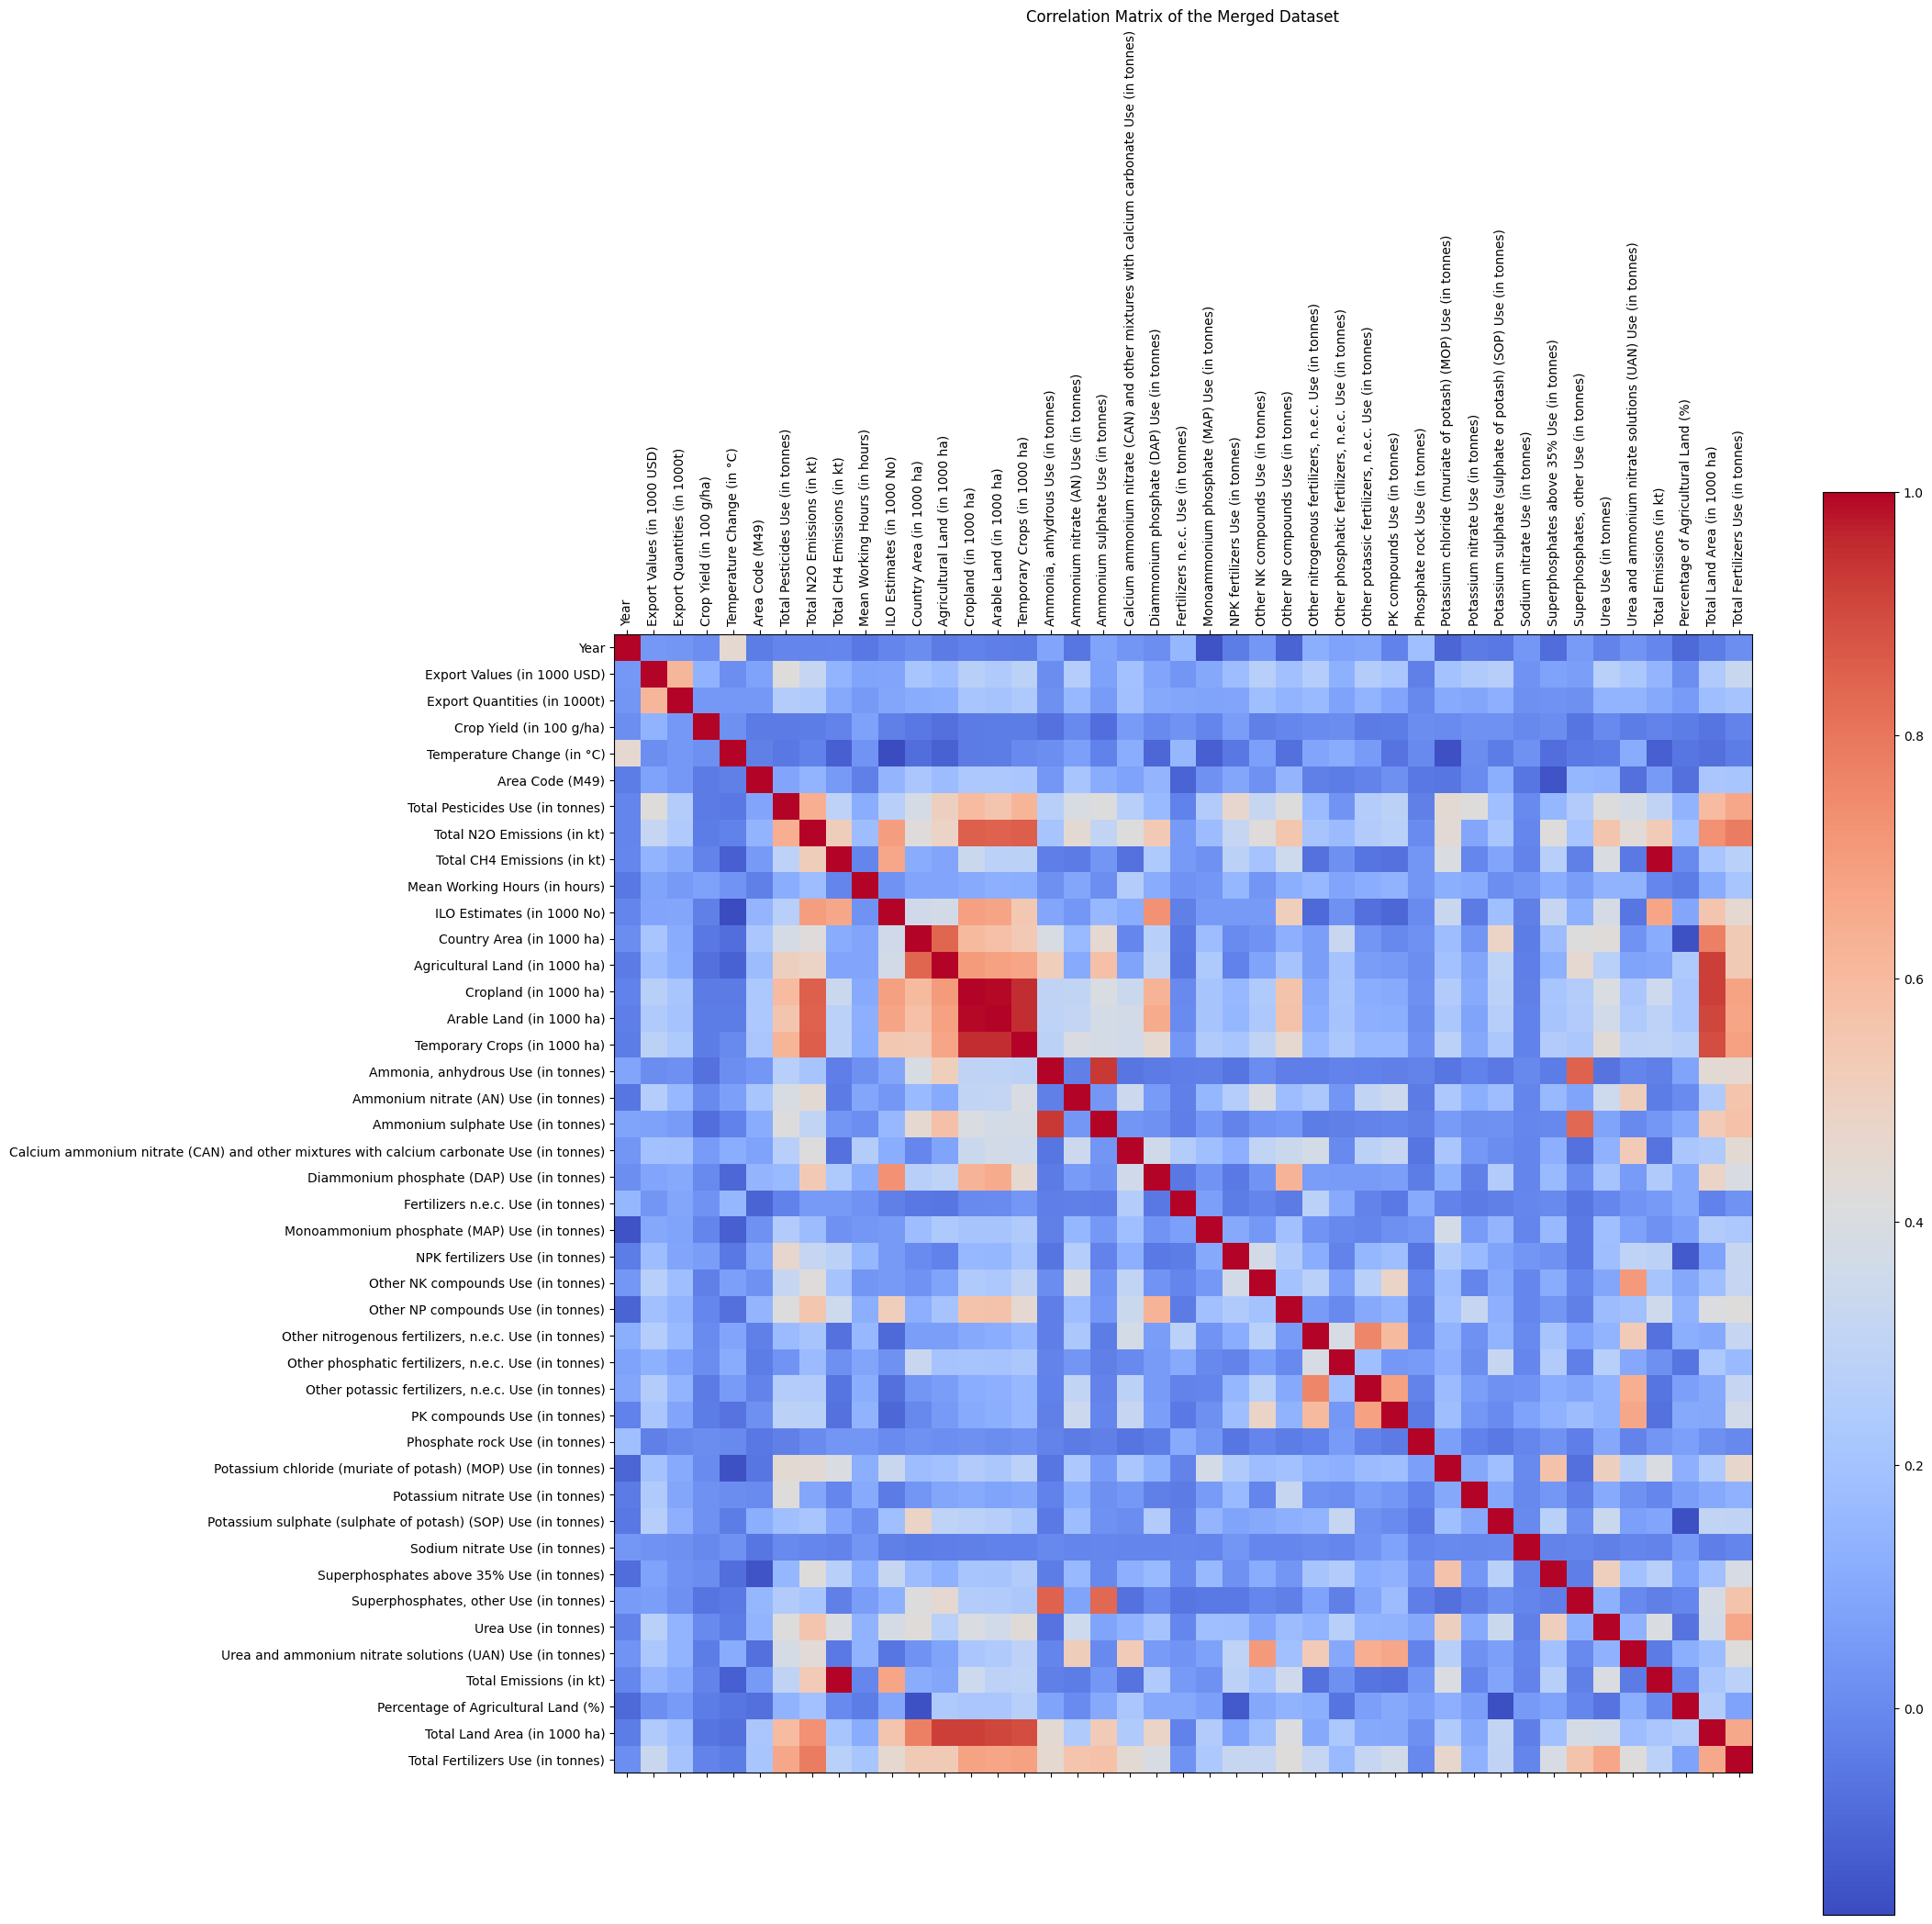

In [509]:
# Plotting the correlation matrix of the numerical columns
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix for numerical columns only
correlation_matrix = merged_df[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of the Merged Dataset')
plt.show()

In [510]:
# Define a threshold for "strong" correlation - in reality, none of these correlations are very strong, just helps as a baseline for weights
threshold = 0.05

# Select the 'crop_yield' row or column in the correlation matrix
crop_yield_correlations = correlation_matrix['Crop Yield (in 100 g/ha)']

# Filter out strong correlations (ignoring the correlation of the variable with itself)
strong_correlations = crop_yield_correlations[(crop_yield_correlations >= threshold) | (crop_yield_correlations <= -threshold) & (crop_yield_correlations.index != 'Crop Yield (in 100 g/ha)')]

# Print out the results
for index, value in strong_correlations.items():
    if index != 'Crop Yield (in 100 g/ha)':  # Exclude the correlation of 'crop_yield' with itself
        print(f"'crop_yield' and '{index}' have a correlation of {value:.2f}")

'crop_yield' and 'Export Values (in 1000 USD)' have a correlation of 0.14
'crop_yield' and 'Mean Working Hours (in hours)' have a correlation of 0.07
'crop_yield' and 'Agricultural Land (in 1000 ha)' have a correlation of -0.07
'crop_yield' and 'Ammonia, anhydrous Use (in tonnes)' have a correlation of -0.07
'crop_yield' and 'Ammonium sulphate Use (in tonnes)' have a correlation of -0.07
'crop_yield' and 'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate Use (in tonnes)' have a correlation of 0.06
'crop_yield' and 'NPK fertilizers Use (in tonnes)' have a correlation of 0.06
'crop_yield' and 'Superphosphates, other Use (in tonnes)' have a correlation of -0.06
'crop_yield' and 'Total Land Area (in 1000 ha)' have a correlation of -0.06
